# **HEART** **DISEASE** **PREDICTION**

Step 1 - Importing libraries

In [ ]:
import sklearn
import numpy as np
import pandas as pd

import plotly as plot
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loaded dataset in dataframe collected from Kaggle
#Add shortcut to heart csv file in our shared folder to My drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/',force_remount=True)
# df = pd.read_csv('/content/drive/My Drive/CBD(Team Project)/heart.csv', header =0)


# Link Dataset :- https://www.kaggle.com/johnsmith88/heart-disease-dataset


# Uploading data set.


from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
df = pd.read_csv('heart.csv')


Step 2 - Visualing Data

In [ ]:
#view first 5 rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
#check shape of the datset i.e number of rows and columns
df.shape

(1025, 14)

In [ ]:
#check for null column values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
#column names of the data frame
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

The following are the column names of the datset
1.)Age: displays the age of the individual.

2.)Sex: displays the gender of the individual using the following format :
1 = male
0 = female

3.)Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
1 = typical angina
2 = atypical angina
3 = non — anginal pain
4 = asymptotic


4.)Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit)

5.)Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

6.)Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
If fasting blood sugar > 120mg/dl then : 1 (true)
else : 0 (false)

7.)Resting ECG : displays resting electrocardiographic results
0 = normal
1 = having ST-T wave abnormality
2 = left ventricular hyperthrophy

8.)Max heart rate achieved : displays the max heart rate achieved by an individual.
Exercise induced angina :
1 = yes
0 = no

9.)ST depression induced by exercise relative to rest: displays the value which is an integer or float.

10.)Peak exercise ST segment :
1 = upsloping
2 = flat
3 = downsloping

11.)Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

12.)Thal : displays the thalassemia :
3 = normal
6 = fixed defect
7 = reversible defect

13.)Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not :
0 = absence
1, 2, 3, 4 = present.  


The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

In [ ]:
df['target']

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [ ]:
#get number of people with heart disease and with no heart disease,
#grouping all true values and ones values
df.groupby('target').size()

target
0    499
1    526
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


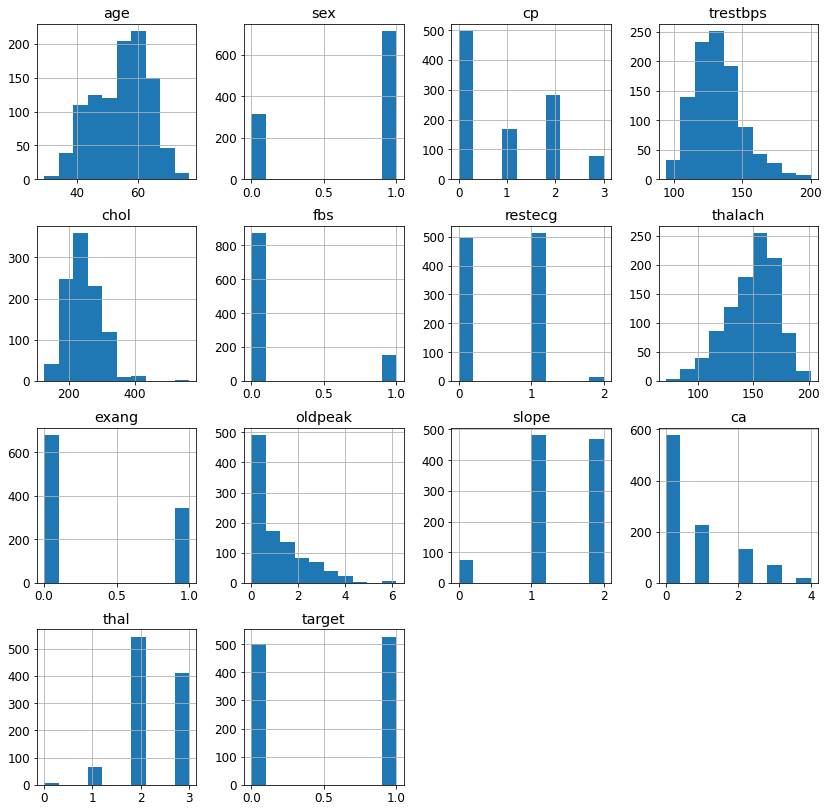

In [ ]:

#Visualization using matplotlib
df.hist(figsize=(14,14),)
plt.show()

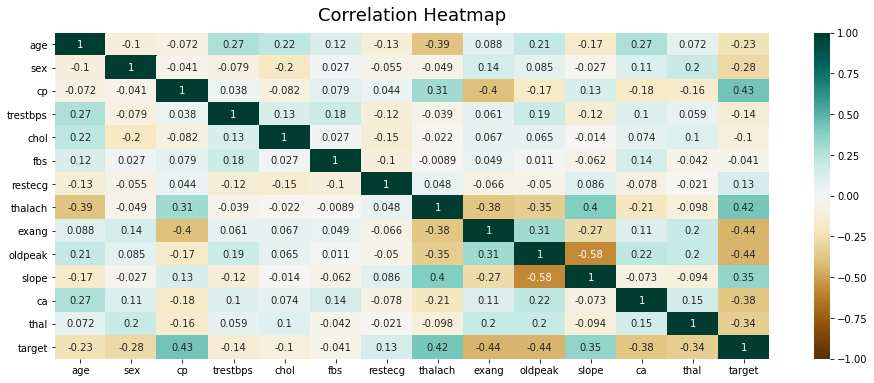

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);


In [ ]:
#About 70% of male are affected by heart dsease as compared to women which is 45%

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



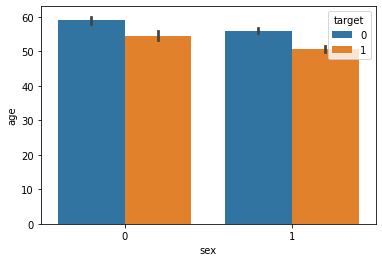

In [ ]:
sns.barplot(df['sex'],df['age'],hue=df['target'])

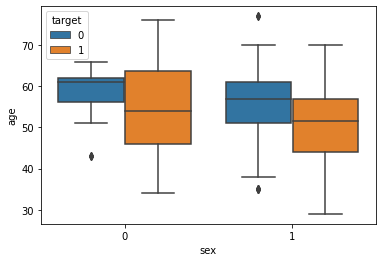

In [ ]:
#Box Plot
sns.boxplot(x='sex',y='age',hue='target',data=df)

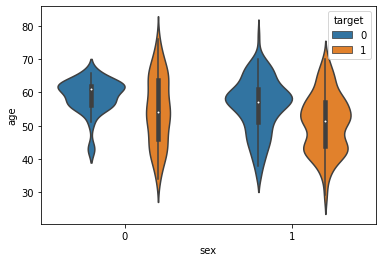

In [ ]:
#Violine plot 
sns.violinplot(x='sex',y='age',hue='target',data=df)

As we can see women around age of 56-57 have heart disease
and men around age of 52-53 have heart disease

Step 3- Preprocessing

store values in x and y loc is used to call df values by names we will store all features in x and target in y
We want all the rows and columns ending thal

In [ ]:
x,y = df.loc[:,:'thal'],df['target']

Now, let us check and y

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

Now,split data for training

In [ ]:


x.size

13325

In [ ]:
y.size

1025

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = (train_test_split(x,y,random_state=20,test_size=0.3,shuffle=True))

Let us check difference between x and z train data as we have split the data

In [ ]:
x.shape

(1025, 13)

In [ ]:

x_train.shape

(717, 13)

In [ ]:
y.size

1025

y_train.size

In [ ]:
y_test.size

308

Step 4 - Prediction


# **LOGISTIC REGRESSION**
This is model works based on probabilty.

 The logistic regression model can be derive from 
 linear regression model by applying sigmiod function.

y  = b0 + b1*x - Linear model

p = 1/(1+e^-y) - Sigmoid function


applying  p to y

ln(p/1-p) = b0 + b1*x - (Logistical regression model)

In [ ]:
#feature scailing 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [ ]:


from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state = 0)
log_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:

#predicting
log_pred = log_model.predict(x_test)
#Confusion metrix
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, log_pred)
print(cm)
log_accurracy = accuracy_score(y_test, log_pred)

[[108  41]
 [ 22 137]]


In [ ]:
print(classification_report(y_test, log_pred))
log_accurracy

              precision    recall  f1-score   support

           0       0.83      0.72      0.77       149
           1       0.77      0.86      0.81       159

    accuracy                           0.80       308
   macro avg       0.80      0.79      0.79       308
weighted avg       0.80      0.80      0.79       308



0.7954545454545454

In [ ]:
#K-Fold cross validation
#k =10
from sklearn.model_selection import cross_val_score
cross_val_score(log_model, x_test, y_test, cv = 10).mean()


0.8216129032258065

In [ ]:
#XG BOOST

XG BOOST is used for increasing the performance of model. 

# XG BOOST

In [ ]:
#Importing xg boost
from xgboost import XGBClassifier
import xgboost as xgb
xglog_model = XGBClassifier().fit(x_train, y_train)

In [ ]:
#predicting XG appllied logistic model
xglog_model_pred = xglog_model.predict(x_test)
accuracy_score(y_test, xglog_model_pred)

0.9090909090909091

In [ ]:
#Confusion metrix
print (confusion_matrix(y_test, xglog_model_pred))

[[132  17]
 [ 11 148]]


In [ ]:
print(classification_report(y_test, xglog_model_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       149
           1       0.90      0.93      0.91       159

    accuracy                           0.91       308
   macro avg       0.91      0.91      0.91       308
weighted avg       0.91      0.91      0.91       308



By Decision Tree Classifier - An algorithm A decision tree is a flowchart-like structure in which each internal node represents a test on a feature (e.g. whether a coin flip comes up heads or tails) 
Analysis patterns of the dataset,after training recognise it

# DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier


Named our model as dm, fit on data

In [ ]:
dm = DecisionTreeClassifier()

In [ ]:
dm.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

predict on x_test

In [ ]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
58,67,1,2,152,212,0,0,150,0,0.8,1,0,3
62,67,1,0,100,299,0,0,125,1,0.9,1,2,2
121,44,1,0,120,169,0,1,144,1,2.8,0,0,1
680,42,1,1,120,295,0,1,162,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,64,0,0,130,303,0,1,122,0,2.0,1,2,2
334,60,1,0,130,206,0,0,132,1,2.4,1,2,3
261,54,1,2,150,232,0,0,165,0,1.6,2,0,3
216,65,1,0,135,254,0,0,127,0,2.8,1,1,3


In [ ]:
y_test

1021    0
58      0
62      0
121     0
680     1
       ..
647     1
334     0
261     1
216     0
257     1
Name: target, Length: 308, dtype: int64

In [ ]:


prediction=dm.predict(x_test)

In [ ]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,

Nw,we will find accuracy

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_dm = accuracy_score(y_test,prediction) 

In [ ]:
accuracy_dm

0.9772727272727273

Feature importance

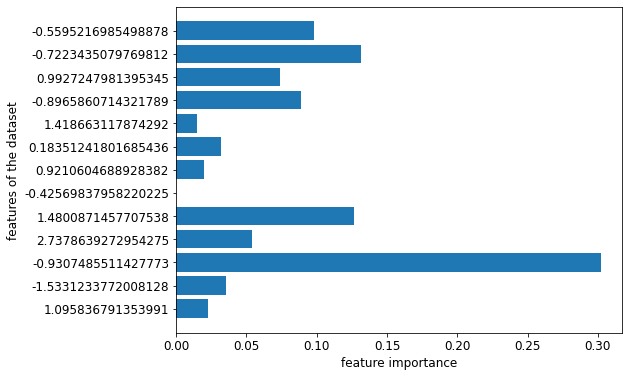

In [ ]:
def most_imp_feature(model):
    plt.figure(figsize=(8,6))
    no_of_features=13
    plt.barh(range(no_of_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(no_of_features),x)
    plt.xlabel("feature importance")
    plt.ylabel("features of the dataset")
    
most_imp_feature(dm)

**bold text**#The Most import featue is chest pain

In [ ]:
Final_prediction=["No,You don't have a heart disease","Yes,you are diagnosed with heart disease"]

In [ ]:
sample_date_for_predict = np.array([[57,0,0,140,241,1,123,1,0,2,1,0,3]])


In [ ]:
sample_date_outcome_dm=dm.predict(sample_date_for_predict)


In [ ]:
sample_date_outcome_dm

array([0])

In [ ]:
print(Final_prediction[int(sample_date_outcome_dm)])

No,You don't have a heart disease


Random Forest Classifier

# RANDOM FOREST CLASSIFIER


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [ ]:
model = RandomForestClassifier(max_depth=5)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
random_forest = RandomForestClassifier(max_depth=5)
random_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predict = random_forest.predict(x_test)

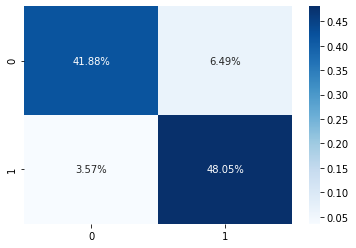

Accuracy is:  89.93506493506493


In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm/np.sum(cm),annot=True,fmt=".2%",cmap='Blues')
plt.show()
ac = accuracy_score(y_test,y_predict)
print('Accuracy is: ',ac*100)

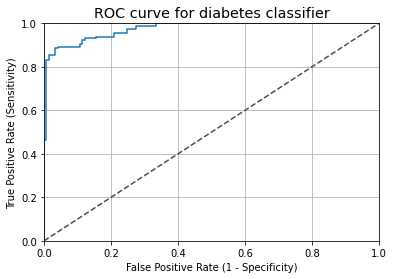

In [ ]:
y_pred_quant = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

# **KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier    # To Train the model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, neighbors


In [ ]:
y = df['target']
x = df.drop(["target"],axis = 1)
x = preprocessing.scale(x)

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [ ]:
# x_train.shape()

In [ ]:
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
accuracy_knn = clf.score(x_train,y_train)
accuracy_knn

0.9372384937238494

In [ ]:
for x,y in zip(x_test, y_test):
  print(f'Predicted Target :{clf.predict([x])[0]},Actual target : {y}')


Predicted Target :0,Actual target : 0
Predicted Target :0,Actual target : 0
Predicted Target :0,Actual target : 0
Predicted Target :0,Actual target : 0
Predicted Target :1,Actual target : 1
Predicted Target :0,Actual target : 0
Predicted Target :1,Actual target : 1
Predicted Target :0,Actual target : 1
Predicted Target :0,Actual target : 1
Predicted Target :0,Actual target : 0
Predicted Target :0,Actual target : 0
Predicted Target :1,Actual target : 1
Predicted Target :1,Actual target : 1
Predicted Target :0,Actual target : 1
Predicted Target :1,Actual target : 1
Predicted Target :1,Actual target : 1
Predicted Target :0,Actual target : 0
Predicted Target :0,Actual target : 0
Predicted Target :1,Actual target : 1
Predicted Target :1,Actual target : 1
Predicted Target :1,Actual target : 1
Predicted Target :0,Actual target : 0
Predicted Target :1,Actual target : 1
Predicted Target :1,Actual target : 1
Predicted Target :1,Actual target : 1
Predicted Target :1,Actual target : 1
Predicted Ta

# **(SVM)Support Vector Machine For Classification**

In [ ]:
# Comparing Knn With SVM classification

# importing svm

from sklearn import svm 

In [ ]:
clf_svm = svm.SVC(kernel = "linear")
clf_svm.fit(x_train, y_train)
Accuracy_1 = clf_svm.score(x_train,y_train)
Accuracy_1

0.8940027894002789

In [ ]:
for x,y in zip(x_test, y_test):
  print(f'Predicted Target :{clf_svm.predict([x])[0]},Actual target : {y}')


Predicted Target :0,Actual target : 0
Predicted Target :0,Actual target : 0
Predicted Target :0,Actual target : 0
Predicted Target :0,Actual target : 0
Predicted Target :1,Actual target : 1
Predicted Target :0,Actual target : 0
Predicted Target :1,Actual target : 1
Predicted Target :1,Actual target : 1
Predicted Target :0,Actual target : 1
Predicted Target :0,Actual target : 0
Predicted Target :1,Actual target : 0
Predicted Target :1,Actual target : 1
Predicted Target :1,Actual target : 1
Predicted Target :1,Actual target : 1
Predicted Target :1,Actual target : 1
Predicted Target :1,Actual target : 1
Predicted Target :0,Actual target : 0
Predicted Target :1,Actual target : 0
Predicted Target :1,Actual target : 1
Predicted Target :1,Actual target : 1
Predicted Target :1,Actual target : 1
Predicted Target :0,Actual target : 0
Predicted Target :1,Actual target : 1
Predicted Target :1,Actual target : 1
Predicted Target :1,Actual target : 1
Predicted Target :1,Actual target : 1
Predicted Ta

# ACCURACY COMPARISION

In [ ]:

models = [
          dm,
        log_model,
        random_forest,
        clf
]

for model in models:
    names = model.__class__.__name__
    
    if model == dm:
      accuracy = accuracy_dm
    elif model == log_model:
      accuracy = log_accurracy
    elif model == clf:
      accuracy = accuracy_knn
    else:
      accuracy = ac
    
    print("-"*20)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))


--------------------
DecisionTreeClassifier:
Accuracy: 97.7273%
--------------------
LogisticRegression:
Accuracy: 79.5455%
--------------------
RandomForestClassifier:
Accuracy: 89.9351%
--------------------
KNeighborsClassifier:
Accuracy: 93.7238%
